In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('outputs\dataset_for_kaggle.csv')

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16948 entries, 0 to 16947
Data columns (total 63 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   date_time                                         16948 non-null  object 
 1   air_pollution_index                               16948 non-null  float64
 2   humidity                                          16948 non-null  float64
 3   wind_speed                                        16948 non-null  float64
 4   wind_direction                                    16948 non-null  float64
 5   visibility_in_miles                               16948 non-null  float64
 6   dew_point                                         16948 non-null  float64
 7   temperature                                       16948 non-null  float64
 8   rain_p_h                                          16948 non-null  float64
 9   snow_p_h         

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_sky is clear,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with light rain,weather_description_very heavy rain,day,month,hour,traffic_volume
0,2015-06-11 20:00:00,0.941176,0.583333,0.1875,0.908333,0.50000,0.50000,0.691273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,0.869565,0.396429
1,2015-06-11 21:00:00,0.910035,0.583333,0.1875,0.908083,0.50625,0.50625,0.698311,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,0.913043,0.405757
2,2015-06-11 22:00:00,0.878893,0.583333,0.1875,0.907833,0.51125,0.51125,0.705349,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,0.956522,0.415085
3,2015-06-11 23:00:00,0.847751,0.583333,0.1875,0.907583,0.51750,0.51750,0.712387,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,1.000000,0.424413
4,2015-06-12 00:00:00,0.816609,0.583333,0.1875,0.907333,0.52250,0.52250,0.719581,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.366667,0.454545,0.000000,0.433742


In [6]:
df = df.set_index('date_time')

In [7]:
X = np.load('outputs/train_x_second_v3.npy')
y = np.load('outputs/train_y_second_v3.npy')

In [9]:
len(X)

16924

In [11]:
X[0].shape

(24, 62)

In [12]:
y.shape

(16924, 1)

# Train Test Split

In [17]:
total_sample = X.shape[0]
split_index = int(total_sample * 0.9)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [18]:
print(f'X_train length == {len(X_train)}')
print(f'X_test length == {len(X_test)}')

X_train length == 15231
X_test length == 1693


# Modelling

In [19]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense

Using TensorFlow backend.


In [20]:
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', 
                            input_shape=(X_train.shape[1], X_train.shape[2]),
                            return_sequences=True)))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dropout(0.4))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss='mae')

In [22]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 15231 samples, validate on 1693 samples
Epoch 1/50
15231/15231 [==============================] - 17s 1ms/step - loss: 0.1246 - val_loss: 0.0801
Epoch 2/50
15231/15231 [==============================] - 13s 876us/step - loss: 0.0778 - val_loss: 0.0593
Epoch 3/50
15231/15231 [==============================] - 13s 831us/step - loss: 0.0655 - val_loss: 0.0566
Epoch 4/50
15231/15231 [==============================] - 13s 822us/step - loss: 0.0604 - val_loss: 0.0476
Epoch 5/50
15231/15231 [==============================] - 13s 854us/step - loss: 0.0567 - val_loss: 0.0433
Epoch 6/50
15231/15231 [==============================] - 14s 890us/step - loss: 0.0542 - val_loss: 0.0425
Epoch 7/50
15231/15231 [==============================] - 13s 882us/step - loss: 0.0517 - val_loss: 0.0390
Epoch 8/50
15231/15231 [==============================] - 12s 819us/step - loss: 0.0505 - val_loss: 0.0404
Epoch 9/50
15231/15231 [==============================] - 13s 847us/step - loss: 0.0487 - val_los

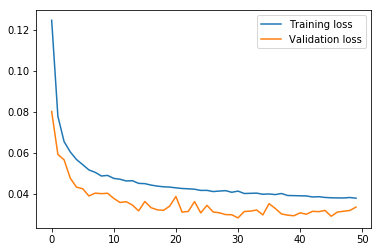

In [24]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [26]:
pred = model.predict(X_test)

In [27]:
X.shape

(16924, 24, 62)

In [29]:
import joblib
scaler = joblib.load('outputs\MM_scaler_second_v2.joblib')

KeyError: 18

In [31]:
features = df.columns.tolist()

In [32]:
import shap

c:\Users\Naufal\anaconda3\envs\shap_upgrade\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
# Use the training data for deep explainer => can use fewer instances
explainer = shap.DeepExplainer(model, X_train[:500])
# explain the the testing instances (can use fewer instanaces)
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(X_test[:500])
# init the JS visualization code

keras is no longer supported, please use tf.keras instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [35]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][1], features)

In [36]:
pred = model.predict(X_test)

In [39]:
type(shap_values)

list

In [40]:
type(shap_values[0])

numpy.ndarray

In [41]:
shap_values[0].shape

(500, 24, 62)

In [51]:
pred[-1]

array([0.19649549], dtype=float32)

In [43]:
len(shap_values[0][0])

24

In [45]:
shap_values[0][0][0].sum()

0.021935266507700567

In [49]:
val = 0

for i in range(len(shap_values[0][0])):
    print(shap_values[0][0][i].sum())
    val = val+shap_values[0][0][i].sum()

print(f'total: {val}')

0.021935266507700567
0.013038898875925721
0.003509456168206657
0.001675784712038151
0.001303111038844525
0.0016851834969067005
0.0018983891554891859
0.0015595295075364216
0.001954297283609388
0.0024673442824225253
0.0030083455420004583
0.003945823905816465
0.009142502929850334
0.00489294504100366
0.00475604060989598
0.0025685932431957935
-0.0025364836184717777
-0.005244189671019253
-0.003376851672839818
0.001727618327609285
-0.007810182255659319
-0.006329170050656554
3.2708549296450555e-05
0.131456074112118
total: 0.18726103602081956


In [108]:
explainer.expected_value

array([0.44255382], dtype=float32)

In [113]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0][-2:], features)

In [114]:
plt.gcf().set_size_inches(10, 8)
force_plot_html = shap.force_plot(explainer.expected_value[0], shap_values[0][0][0], features)
with open("force_plot.html", "w") as f:
    f.write(force_plot_html.html())

<Figure size 720x576 with 0 Axes>

In [62]:
shap_values_daily = []

for i in range(len(shap_values[0][0])):
    shap_values_daily.append(shap_values[0][0][i].sum())

In [68]:
shap_values_daily = np.array(shap_values_daily)

In [69]:
shap_values_daily.shape

(24,)

In [66]:
shap_values[0][0][5].shape

(62,)

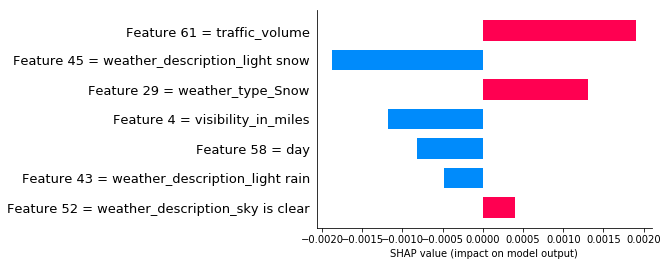

In [89]:
shap.bar_plot(shap_values[0][0][22], features)

In [82]:
feature_daily = []
for i in range(24, 0, -1):
    feature_daily.append(f'day-{i}')

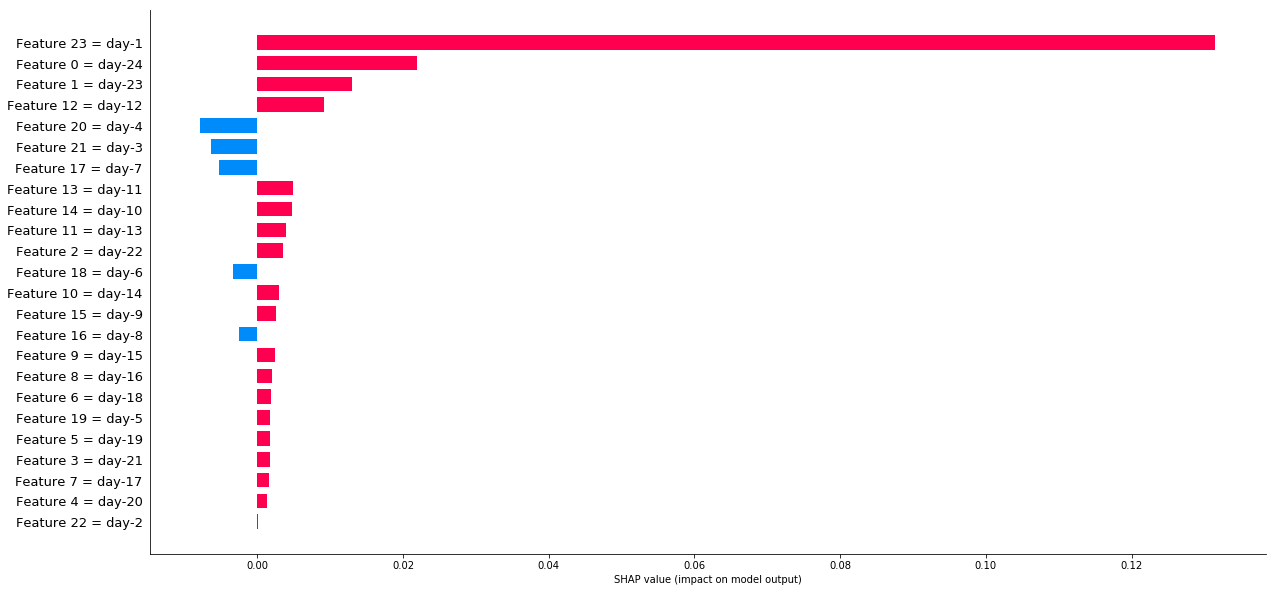

In [102]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values_daily,feature_daily, max_display=24)

In [90]:
shap_values[0][0].shape

(24, 62)

In [91]:
shap_values_sum = np.sum(shap_values[0][0], axis=0)
shap_values_sum

array([ 3.19600658e-04,  1.10698063e-03,  1.41054703e-03,  3.79148442e-05,
        1.34672457e-03,  1.01624100e-03,  5.36689473e-03,  9.05789619e-07,
        0.00000000e+00,  1.54124247e-03,  0.00000000e+00,  0.00000000e+00,
        1.21056702e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.25778200e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.99973821e-03,  9.85637692e-03,
        1.81144043e-04,  1.04303699e-03,  5.62287748e-04,  2.17327351e-03,
        1.91649264e-02, -4.33682161e-02,  1.38854088e-04,  2.80388275e-03,
        1.01213114e-04,  5.80132082e-03,  1.23303932e-03,  0.00000000e+00,
        6.11221034e-04,  0.00000000e+00,  3.59701886e-04,  0.00000000e+00,
        8.93462619e-05,  0.00000000e+00,  0.00000000e+00,  1.29768736e-02,
        0.00000000e+00, -3.41837164e-02,  1.71534396e-03,  1.33254511e-03,
       -8.07643997e-04,  0.00000000e+00,  9.50925276e-05, -2.36501205e-04,
        2.98135193e-03,  

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

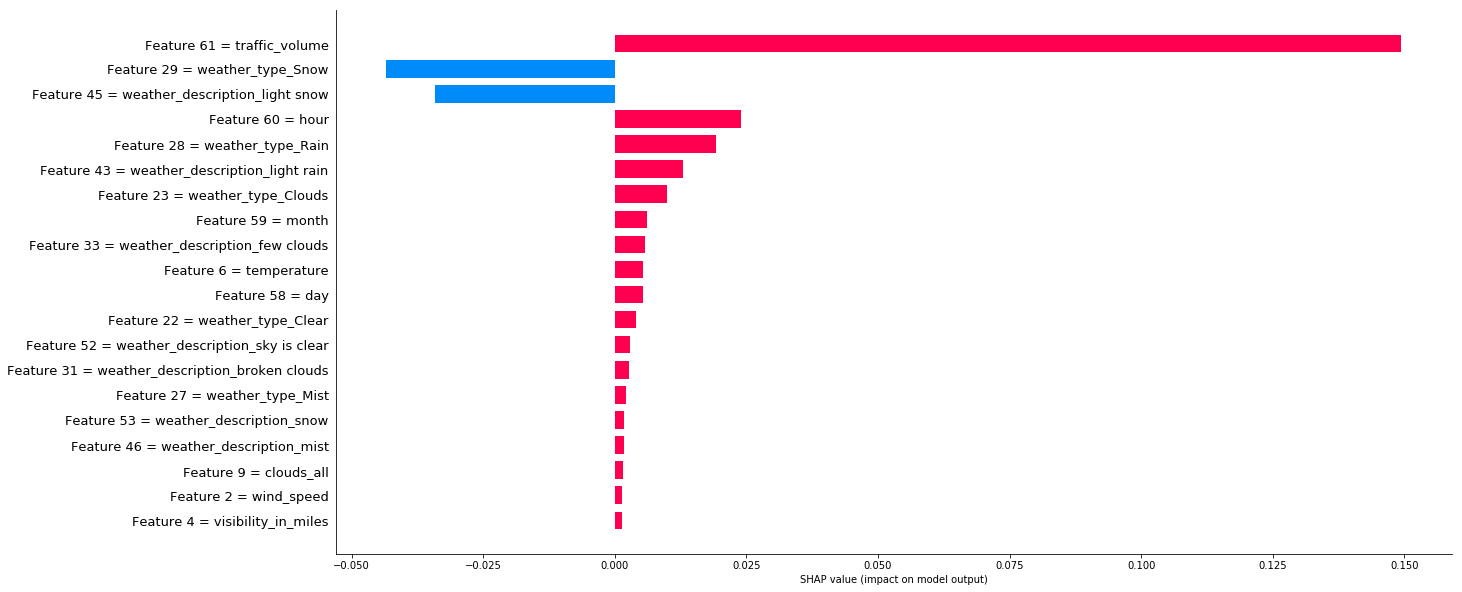

In [101]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values_sum,features, max_display=20)